In [1]:
import os
from os.path import join, basename, isfile
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import math
from itertools import chain
import datetime

In [11]:
# CONSTS
proj_dir = 'PROJ_DIR'
data_dir = join(proj_dir, 'data')
NUM_EPOCH_CONST = 1900

In [12]:
# INPUTS

exp_prefix = '10-04-01-tool-dqn-dynamic-static-resetfree'
exps_dir = join(data_dir, exp_prefix)
# empty seeds list to do all. otherwise list of lists, where inner lists group diff seeds of same exp

# resetfree wall axe
#seeds = [[51947,52881,12644], [62475,67891,54029], [50059,13719,13246], [63674,58157,44467], [42715,86348,5663]]
# reset wall axe
#seeds = [[14385,49349,13272], [26671,88259,1725], [48810,2035], [51138,45712,94418], [75533,26175,18905]]
# resetfree deer
# seeds = [[36188,15142,63542], [31970,46911,65753], [53370,70088,99247], [66452,91302,9412], [33775,75419,83234]]
# reset deer
#seeds = [[3610,44260,64924], [14757,65465,96399], [10252,41277,44729], [20878,72437,7459], [40095,53219,97867]]

seeds = [[49019, 32127], [27923, 43916, 95792]]

# titles of exps in positions corresponding to those in `seeds`
titles = ['Resource Probability 0.1', 'Static']
save_suffix = 'resetfree'
save_dir = 'axe_dynstat'
num_viz = 4
# how often the visit counts were saved
visit_period = 100

In [13]:
save_dir = join('heatmaps', save_dir)
os.makedirs(save_dir, exist_ok=True)

In [14]:
def roundup(x, period):
    return int(math.ceil(x / period)) * period

def get_epoch(max_epoch, num_viz, i, visit_period):
    return min(roundup(max_epoch // (num_viz - 1) * i, visit_period), max_epoch) if num_viz > 1 else max_epoch

0
700
1300
1900
0
700
1300
1900


/home/suvansh/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


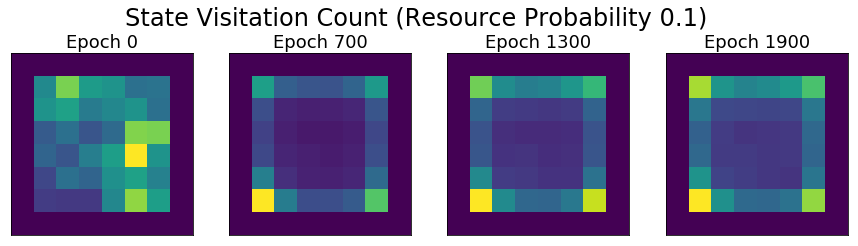

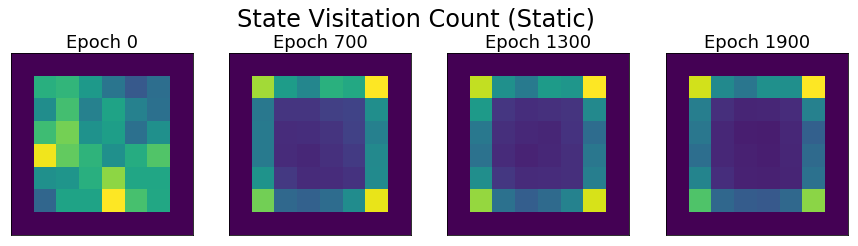

In [15]:
dirpath, dirnames, _ = next(os.walk(exps_dir))

if not seeds:
    for exp_dir in dirnames:
        # plotting setup
        fig, axes = plt.subplots(1, num_viz, figsize=(10,60))
        plt.subplots_adjust(hspace=0.001)

        full_path = join(dirpath, exp_dir)
        print(exp_dir)
        visit_files = glob(join(full_path, 'visit_*.npy'))
        if not visit_files:
            continue
        max_epoch_file = max(visit_files, key=lambda f: int(basename(f)[6:-4]))
        max_epoch = int(basename(max_epoch_file)[6:-4])
        for i in range(num_viz):
            epoch = get_epoch(max_epoch, num_viz, i, visit_period)
            visit_count = np.load(join(full_path, 'visit_%d.npy' % epoch))
            axes[i].set_title('Epoch %d' % (epoch // 10))
            axes[i].imshow(visit_count)
        # TODO save `fig`
else:
    for sg_idx, seed_group in enumerate(seeds):
        visit_counts = [[] for _ in range(num_viz)]
        for seed in seed_group:
            exp_dir = glob(join(exps_dir, '*%d' % seed))[0]
            
#             visit_files = glob(join(exp_dir, 'visit_*.npy'))
#             if not visit_files:
#                 continue
#             max_epoch_file = max(visit_files, key=lambda f: int(basename(f)[6:-4]))
#             max_epoch = int(basename(max_epoch_file)[6:-4])
#             print(max_epoch)
            
            for i in range(num_viz):
                epoch = get_epoch(NUM_EPOCH_CONST, num_viz, i, visit_period)
                visit_path = join(exp_dir, 'visit_%d.npy' % epoch)
                if not isfile(visit_path):
                    continue
                visit_count = np.load(visit_path)
                visit_counts[i].append(visit_count)
        sums = [sum(vc) for vc in visit_counts]
        fig, axes = plt.subplots(1, num_viz, figsize=(15,4))
        for i, s in enumerate(sums):
            axes[i].set_title('Epoch %d' % get_epoch(NUM_EPOCH_CONST, num_viz, i, visit_period), fontsize=18)
            print(get_epoch(NUM_EPOCH_CONST, num_viz, i, visit_period))
            axes[i].imshow(s)
            axes[i].set_xticks([])
            axes[i].set_yticks([])
        fig.show()
        fig.suptitle('State Visitation Count (%s)' % titles[sg_idx], fontsize=24)
        plt.savefig(join(save_dir, '%s_%s_%s.png' % (titles[sg_idx], exp_prefix, save_suffix)), bbox_inches=0)